<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <br>
    <h1 style = "padding-left: 13px;">Global Country Analytics 🌎</h1>
    <ul>
        <li>Dataset available on <a href="https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023/code">kaggle </a></li>
    </ul>
    <br>
</div>

In [1]:
# Python's Version
from platform import python_version
print(f"Python's version for this project: {python_version()}")

Python's version for this project: 3.10.12


In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal
import warnings

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install watermark -q

In [4]:
# Package's version
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

numpy     : 1.23.5
seaborn   : 0.12.2
pandas    : 1.5.3
matplotlib: 3.7.2



In [5]:
# Function to identify missing values with it's representativeness in %
def missing_values(df, column):
    if df[column].isna().sum() > 0:
        print(f"{column}: {df[column].isna().sum()} missing values.")
        print(f"Wich represents {round(df[column].isna().sum() / len(df), 2)}% of missing values.")
        print("-=" * 30)
    else:
        print("0 missing values")

In [6]:
# Function to show it's mean and median in order to choose the best
# option to make an imputation
def mean_median(df, column):
    print(f"{column} mean  : {round(df[column].mean(), 2)}")
    print(f"{column} median: {df[column].median()}")

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-left: 16px;
              padding-top: 15px;">
    <h1> Loading Dataset </h1>
    <br>
</div>

In [7]:
# Display all columns
pd.set_option("display.max_column", None)

In [8]:
df = pd.read_csv("/kaggle/input/countries-of-the-world-2023/world-data-2023.csv")
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [9]:
# Shape
df.shape

(195, 35)

In [10]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-left: 16px;
              padding-top: 15px">
    <h1> Exploratory Analysis </h1>
    <br>
</div>

In [11]:
# Creating a list with the columns names to be converted
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

In [12]:
# Replacing the unnecessary symbols
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x) \
                                               .replace(',', '') \
                                               .replace('$', '') \
                                               .replace('%', '')))

In [13]:
# Missing Values?
for col in df.columns:
    missing_values(df, col)

0 missing values
0 missing values
Abbreviation: 7 missing values.
Wich represents 0.04% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Agricultural Land( %): 7 missing values.
Wich represents 0.04% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Land Area(Km2): 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Armed Forces size: 24 missing values.
Wich represents 0.12% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Birth Rate: 6 missing values.
Wich represents 0.03% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Calling Code: 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Capital/Major City: 3 missing values.
Wich represents 0.02% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Co2-Emi

In [14]:
df.dtypes

Country                                       object
Density\n(P/Km2)                             float64
Abbreviation                                  object
Agricultural Land( %)                        float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                float64
CPI                                          float64
CPI Change (%)                               float64
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                          float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-left: 16px;
              padding-top: 15px">
    <h1>Descriptive Analysis </h1>
    <br>
</div>

In [15]:
# Creating a numerical variable to receive the float columns
numerical_columns = df.select_dtypes(include = ["float64"])
numerical_columns.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195.000000,188.000000,1.940000e+02,1.710000e+02,189.000000,194.000000,1.880000e+02,178.000000,179.000000,188.000000,188.000000,175.000000,1.930000e+02,188.000000,183.000000,189.000000,187.000000,181.000000,150.000000,188.000000,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02,194.000000,194.000000
mean,356.764103,39.117553,6.896244e+05,1.592749e+05,20.214974,360.546392,1.777992e+05,190.460955,6.722346,2.698138,32.015426,1.002457,4.772959e+11,102.470213,37.963388,21.332804,72.279679,160.392265,2.194133,32.637234,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07,19.092351,20.232434
std,1982.888967,21.783052,1.921609e+06,3.806288e+05,9.945774,323.236419,8.387903e+05,397.947380,24.450414,1.282267,23.791331,0.368858,2.172173e+12,13.151607,29.261022,19.548058,7.483661,233.502024,2.970796,19.172697,1.684261,1.450924e+08,10.502907,6.961632,20.557662,5.079216,7.543050e+07,23.961779,66.716110
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242
25%,35.500000,21.700000,2.382825e+04,1.100000e+04,11.300000,82.500000,2.304250e+03,113.885000,1.000000,1.705000,11.000000,0.755000,8.454620e+09,98.950000,12.150000,6.000000,67.000000,13.000000,0.402500,17.450000,0.332500,1.962678e+06,56.150000,11.700000,30.600000,3.395000,1.152961e+06,4.544175,-7.941496
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,216.500000,55.375000,5.242560e+05,1.420000e+05,28.750000,506.750000,6.388425e+04,157.265000,4.250000,3.597500,48.175000,1.240000,2.340940e+11,108.025000,63.150000,32.700000,77.500000,186.000000,2.447500,43.975000,2.935000,2.858549e+07,69.500000,21.100000,48.000000,9.490000,1.490324e+07,40.124603,48.281523
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


In [16]:
# Printing the mean and median because the representation is in cientific notation
mean_median(df, "Land Area(Km2)")

Land Area(Km2) mean  : 689624.37
Land Area(Km2) median: 119511.0


In [17]:
# Missing Values?
missing_values(df, "Land Area(Km2)")

Land Area(Km2): 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-left: 16px;
              padding-top: 15px">
    <ul>
        <li>There's a <b>huge difference</b> between the mean and the median on <i>Land Area(Km2)</i>, let's check it out if there's an <b>Outlier</b> or invalid value.</li>
    </ul>
    <br>
</div>

In [18]:
# Setting up the scale to be ploted on the graphic
scale = [x for x in range(1000000, 19000000, 1000000)]

In [19]:
# Increasing the graphic quality
%config InlineBackend.figure_format = "svg"

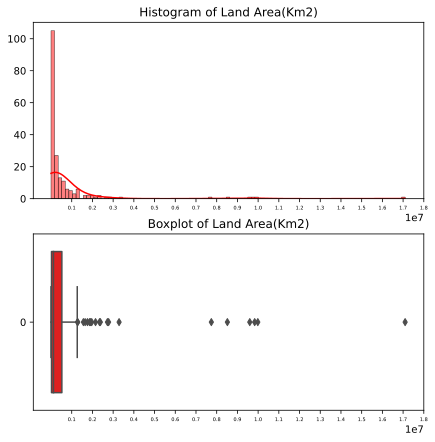

In [20]:
# Figure, axes
plt.figure(figsize=(7, 7))

# Histplot to find out the data distribution
plt.subplot(211)
sns.histplot(data=df["Land Area(Km2)"], kde=True, color="red")
plt.title("Histogram of Land Area(Km2)")
plt.ylabel("")
plt.xticks(size=5, ticks=scale)
plt.xlabel("")

# Boxplot
plt.subplot(212)
sns.boxplot(data=df["Land Area(Km2)"], orient="h", color="red")
plt.title("Boxplot of Land Area(Km2)")
plt.xlabel("")
plt.xticks(size=5, ticks=scale)

# Show
plt.show()

<div style = "font-family: bookman old style;
              padding-left: 16px;
              padding-top: 20px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <ul>
    <li>The most of the data are concentred before the first point of the scale, which means that there's an assimetric distribution of the data, besides the Outliers, let's check it out.</li>
    </ul>
    <br>
</div>

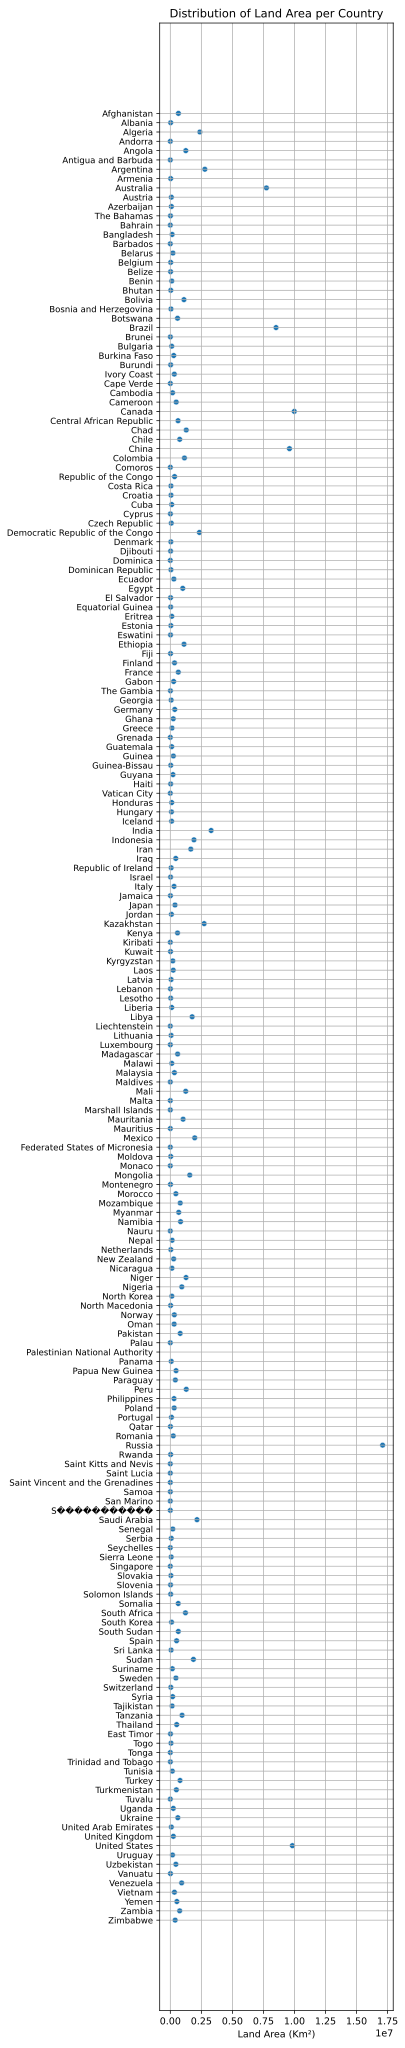

In [21]:
# Figure, axes
fig, ax = plt.subplots(figsize=(6, 30))

# Create a boxplot
ax = sns.scatterplot(y=df["Country"], x=df["Land Area(Km2)"])

# Set labels and title
plt.xlabel("Land Area (Km²)")
plt.ylabel("")
ax.set_title("Distribution of Land Area per Country")

plt.grid(visible=True)

# Rotate x-axis labels for better readability
plt.yticks(size=9)

# Show the plot
plt.tight_layout()

# Show
plt.show()

In [22]:
# Imputation with median because of the outlier values

# Taking the index where Land Area is NaN
land_area = df[df["Land Area(Km2)"].isna()].index

# Imputation
df["Land Area(Km2)"][land_area] = df["Land Area(Km2)"].median()

<div style = "font-family: bookman old style;
              font-size: 17px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li><b style = "color: red">Q1:</b> What are the top 10 Countries with <b>Biggest Land Area(Km2)</b>?</li>
    </ul>
    <br>
</div>

In [23]:
# Aggregation
top_10 = df.groupby(["Country"])["Land Area(Km2)"].agg(["sum"]).sort_values(by="sum",
                                                                   ascending=False).head(10)

In [24]:
top_10.reset_index
top_10

,sum
Country,
Russia,17098240.0
Canada,9984670.0
United States,9833517.0
China,9596960.0
Brazil,8515770.0
Australia,7741220.0
India,3287263.0
Argentina,2780400.0
Kazakhstan,2724900.0


In [25]:
# Setting up the colors for the bars
bcolors = ["#00004c"]

for i in range(0, 3):
    bcolors.append("#1919ff")
    
for j in range(0, 2):
    bcolors.append("#4c4cff")
    
for y in range(0, 4):
    bcolors.append("#7f7fff")

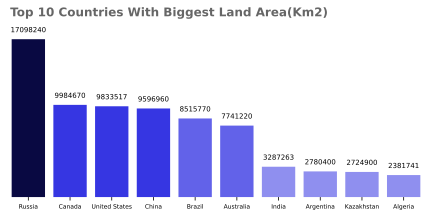

In [26]:
# Figure, axes
fig, ax = plt.subplots(figsize=(7.5, 3))

# Barplot
ax = sns.barplot(x=top_10.index, y=top_10["sum"], palette=bcolors)

# Data label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                size = 7)
# Title
fig.text(y = 0.95,
         x = 0.13,
         s = "Top 10 Countries With Biggest Land Area(Km2)",
         fontdict = {"family": "bookman old style",
                     "size": 12,
                     "weight": "bold"},
         alpha=0.6)

# Labels
plt.xticks(size = 6)
plt.xlabel("")
plt.yticks([])
plt.ylabel("")

# Removing the borders
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Show
plt.show()

<div style = "font-family: bookman old style;
              font-size: 17px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li><b style = "color: red">Q2:</b> Considering the <b>top biggest land area(km2) countries</b>, which of them have more space dedicated to agricultural?</li>
    </ul>
    <br>
</div>    

In [27]:
# Missing values?
missing_values(df, "Agricultural Land( %)")

Agricultural Land( %): 7 missing values.
Wich represents 0.04% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [28]:
# Comparing the mean and median
df["Agricultural Land( %)"].describe()

count    188.000000
mean      39.117553
std       21.783052
min        0.600000
25%       21.700000
50%       39.600000
75%       55.375000
max       82.600000
Name: Agricultural Land( %), dtype: float64

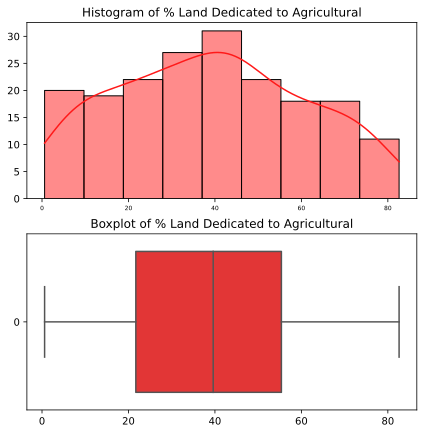

In [29]:
# Figure, axes
plt.figure(figsize=(7,7))

# Histplot to see the data distribution
plt.subplot(211)
sns.histplot(data=df["Agricultural Land( %)"], kde=True, color="#ff1919")
plt.title("Histogram of % Land Dedicated to Agricultural")
plt.xticks(size=6)
plt.xlabel("")
plt.ylabel("")

# Boxplot
plt.subplot(212)
sns.boxplot(data=df["Agricultural Land( %)"], orient="h", color="#ff1919")
plt.title("Boxplot of % Land Dedicated to Agricultural")
# Show
plt.show()

In [30]:
# Making an imputation with mean

# Taking the index where Agricultural is NaN
nan_index = df[df["Agricultural Land( %)"].isna()].index

# Imputation
df["Agricultural Land( %)"][nan_index] = df["Agricultural Land( %)"].mean()

In [31]:
# Aggregating by Land Area to get the top 10
percent_agricultura_land = df[["Country",
                               "Land Area(Km2)",
                               "Agricultural Land( %)"]] \
                           .sort_values(by=["Land Area(Km2)",
                                            "Agricultural Land( %)"],
                                        ascending = [False, False]).head(10)

In [32]:
percent_agricultura_land.drop(columns=["Land Area(Km2)"], inplace=True)

In [33]:
# Ordering by Agricultural
percent_agricultura_land = percent_agricultura_land.sort_values(by="Agricultural Land( %)", 
                                                                ascending = False)

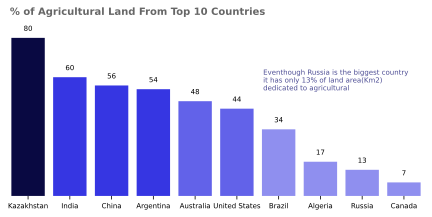

In [34]:
# Figure, axes
fig, ax = plt.subplots(figsize=(7.5, 3))

# Barplot
ax = sns.barplot(x=percent_agricultura_land["Country"],
                 y=percent_agricultura_land["Agricultural Land( %)"],
                 palette=bcolors)

# Data label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                size = 7)
# Title
fig.text(y = 0.95,
         x = 0.13,
         s = "% of Agricultural Land From Top 10 Countries",
         fontdict = {"family": "bookman old style",
                     "weight": "bold"},
         alpha=0.6)

# Insight
fig.text(y = 0.6,
         x = 0.6,
         s = "Eventhough Russia is the biggest country \nit has only 13% of land area(Km2) \ndedicated to agricultural",
         fontdict = {"family": "bookman old style",
                     "size": 7,
                     "color": "#000066"},
         alpha=0.7)

# Labels
plt.xticks(size = 7)
plt.xlabel("")
plt.yticks([])
plt.ylabel("")

# Removing borders
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Show
plt.show()

<div style = "font-family: bookman old style;
              font-size: 17px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li><b style = "color: red">Q3:</b> Considering all countries, which one have more space dedicated to agricultural?</li>
    </ul>
    <br>
</div>    

In [35]:
# Aggregating by Agricultural
agricultural = df[["Agricultural Land( %)", "Country"]].sort_values(by="Agricultural Land( %)",
                                                                    ascending=False).head(5)
agricultural

,Agricultural Land( %),Country
187,82.6,Uruguay
151,80.8,Saudi Arabia
87,80.4,Kazakhstan
161,79.8,South Africa
27,79.2,Burundi


In [36]:
# Defining the X and Y axes
x = agricultural["Agricultural Land( %)"]
y = agricultural["Country"]

In [37]:
# Colors for the bars
colors = ["#0f1f07", "#172e0b", "#1f3e0f", "#274e13", "#274e13"]

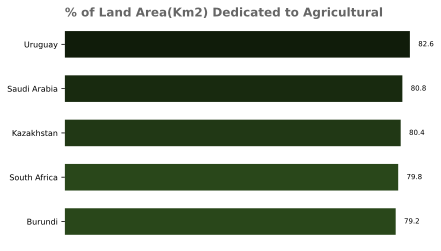

In [38]:
# Figure, axes
fig, ax = plt.subplots(figsize=(6.5, 4))

# Barplot
ax = sns.barplot(x=x, y=y, orient="h", palette=colors, width=0.6) 

# Labels
plt.ylabel("")
plt.yticks(size=8)
plt.xticks([])
plt.xlabel("")

# Title
fig.text(y=0.9,
         x=0.125,
         s="% of Land Area(Km2) Dedicated to Agricultural",
         fontdict={"family": "bookman old style",
                   "size": 12,
                   "weight": "bold"},
         alpha=0.6)

# Data label
for i, v in enumerate(x):
    ax.text(v + 2, i, str(v), color='black', ha='left', va='center', size=7)

# Removing the bordes
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
         
# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li>Besides of been on <b>top 10 biggest land area(km2) countries</b>, <i>Kazakhstan</i> is the <b>3º country</b> with biggest space dedicated to Agricultural, staying behind <i>Uruguai</i> and <i>Saudi Arabia</i>.</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              font-size: 17px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li><b style = "color: red">Q4:</b> Considering all countries, which one have the highest percent of Forested Area?</li>
    </ul>
    <br>
</div>   

In [39]:
# Missing Values
missing_values(df, "Forested Area (%)")

Forested Area (%): 7 missing values.
Wich represents 0.04% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [40]:
df[df["Forested Area (%)"].isna()]

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
56,Eswatini,67.0,NaN,39.117553,17364.0,NaN,NaN,268.0,Mbabane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.791304e+09,NaN,NaN,NaN,Mbabane,NaN,NaN,NaN,English,11.3,NaN,1093238.0,NaN,28.6,NaN,NaN,NaN,-26.522503,31.465866
73,Vatican City,2003.0,NaN,39.117553,0.0,NaN,NaN,379.0,Vatican City,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,41.902916,12.453389
113,Monaco,26337.0,MC,39.117553,2.0,NaN,5.90,377.0,Monaco City,NaN,NaN,NaN,EUR,NaN,NaN,2.00,7.184844e+09,NaN,NaN,2.6,Monaco City,NaN,NaN,11.72,French,6.1,6.56,38964.0,NaN,NaN,NaN,NaN,38964.0,43.738418,7.424616
120,Nauru,541.0,NR,39.117553,21.0,NaN,NaN,674.0,Yaren District,NaN,NaN,NaN,AUD,NaN,NaN,NaN,1.330000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,10084.0,NaN,NaN,NaN,NaN,NaN,-0.522778,166.931503
128,North Macedonia,83.0,NaN,39.117553,25713.0,NaN,NaN,389.0,Skopje,NaN,NaN,NaN,MKD,NaN,NaN,NaN,1.022078e+10,NaN,NaN,NaN,Skopje,NaN,NaN,NaN,Macedonian,35.6,NaN,1836713.0,NaN,NaN,NaN,NaN,NaN,41.608635,21.745275
133,Palestinian National Authority,847.0,NaN,39.117553,119511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arabic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.952162,35.233154
163,South Sudan,18.0,SS,39.117553,644329.0,185000.0,35.01,211.0,Juba,1727.0,4583.71,187.9,SSP,4.7,NaN,0.28,1.199780e+10,73.0,NaN,63.7,Juba,57.6,1150.0,NaN,English,61.3,NaN,11062113.0,72.4,NaN,31.4,12.24,2201250.0,6.876992,31.306979


In [41]:
# Mean Vs Median
mean_median(df, "Forested Area (%)")

Forested Area (%) mean  : 32.02
Forested Area (%) median: 32.0


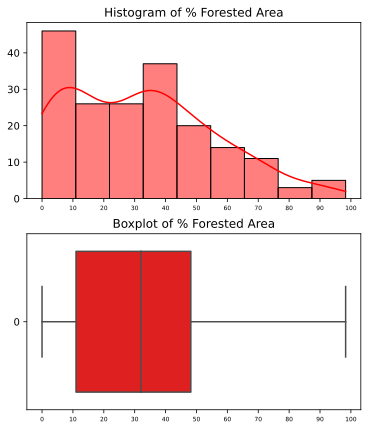

In [42]:
# Figure, axes
plt.figure(figsize=(6, 7))

# Histgram
plt.subplot(211)
sns.histplot(data=df["Forested Area (%)"], kde=True, color="red")
plt.title("Histogram of % Forested Area")
plt.xlabel("")
plt.ylabel("")
plt.xticks(size=6, ticks=[0,10,20,30,40,50,60,70,80,90,100])

# Boxplot
plt.subplot(212)
sns.boxplot(data=df["Forested Area (%)"], orient="h", color="red")
plt.title("Boxplot of % Forested Area")
plt.xticks(size=6, ticks=[0,10,20,30,40,50,60,70,80,90,100])

# Show
plt.show()

<div style = "font-family: bookman old style;
              font-size: 13px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>Eventhough the data doesn't follow a normal distribution, the mean and median are similar, wich means that we don't have Outliers in this variable, so we can use the mean to make the imputation on NaN values.</li>
    </ul>
    <br>
</div>   

In [43]:
# Taking the index where Forested Area is NaN
nan_index = df[df["Forested Area (%)"].isna()].index

# Imputation
df["Forested Area (%)"][nan_index] = df["Forested Area (%)"].mean()

In [44]:
df["Forested Area (%)"].isna().sum()

0

In [45]:
# Aggregating by Forested Area
df[["Country",
    "Land Area(Km2)",
    "Agricultural Land( %)",
    "Forested Area (%)"]].sort_values(by="Forested Area (%)",
                                      ascending=False)

,Country,Land Area(Km2),Agricultural Land( %),Forested Area (%)
167,Suriname,163820.0,0.6,98.3
111,Federated States of Micronesia,702.0,31.4,91.9
61,Gabon,267667.0,20.0,90.0
154,Seychelles,455.0,3.4,88.4
132,Palau,459.0,10.9,87.6
...,...,...,...,...
51,Egypt,1001450.0,3.8,0.1
97,Libya,1759540.0,8.7,0.1
149,San Marino,61.0,16.7,0.0
130,Oman,309500.0,4.6,0.0


In [46]:
# Setting up the scale to be ploted on the graphic
scale = [x for x in range(0, 19000000, 1000000)]
percent = [x for x in range(0, 110, 10)]

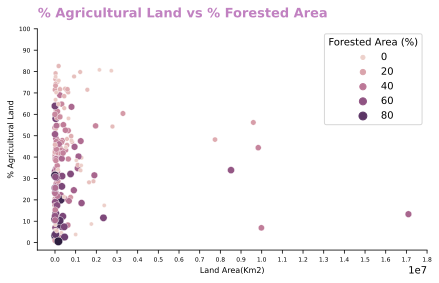

In [47]:
# Figure
fig, ax = plt.subplots(figsize=(7, 4))

# Scatterplot
ax = sns.scatterplot(x="Land Area(Km2)",
            y="Agricultural Land( %)",
            hue="Forested Area (%)",
            size="Forested Area (%)",
            data=df)
                     

# Title
fig.text(y=0.92,
         x=0.126,
         s="% Agricultural Land vs % Forested Area",
          fontdict={"family": "bookman old style",
                    "size": 13,
                    "weight": "bold",
                    "color": "#a64ca6"},
          alpha=0.7)
         
    
# Labels
plt.xticks(ticks=scale, size=6)
plt.yticks(ticks=percent, size=6)
plt.xlabel("Land Area(Km2)", size=8)
plt.ylabel("% Agricultural Land", size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li>The <b>higher</b> the percentage of Agricultural Land, the <b>lower</b> the percentage of Forested Area.</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              font-size: 17px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li><b style = "color: red">Q4:</b> Wich country has the highest population?</li>
    </ul>
    <br>
</div>   

In [48]:
# Missing Values?
missing_values(df, "Population")

Population: 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [49]:
# mean vs median
mean_median(df, "Population")

Population mean  : 39381164.01
Population median: 8826588.0


In [50]:
# checking the register wich doesn't have the population information
df[df["Population"].isna()]

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
133,Palestinian National Authority,847.0,NaN,39.117553,119511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.015426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arabic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.952162,35.233154


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>There's a huge difference between the mean and median which is totally normal considering the countries around the world, however we cannot replace NaN values with median because we're talking about a whole country, and this country doesn't have too much information to work on it, so we're going to drop this register.</li>
    </ul>
    <br>
</div>   

In [51]:
# Checking the register that is Null
nan_index = df[df["Population"].isna()].index

In [52]:
df.drop(nan_index, inplace=True)

In [53]:
# Aggregating by Population
most_populated = df[["Population",
                     "Country"]].sort_values(by="Population",
                                             ascending=False).head(10)

# Converting the number from scientific notation to decimal
most_populated["Population"] = most_populated["Population"].apply(lambda x: Decimal(x))
most_populated                                       

,Population,Country
36,1397715000,China
77,1366417754,India
186,328239523,United States
78,270203917,Indonesia
131,216565318,Pakistan
23,212559417,Brazil
126,200963599,Nigeria
13,167310838,Bangladesh
143,144373535,Russia
85,126226568,Japan


In [54]:
# Setting axes X and Y
x = most_populated["Population"]
y = most_populated["Country"]

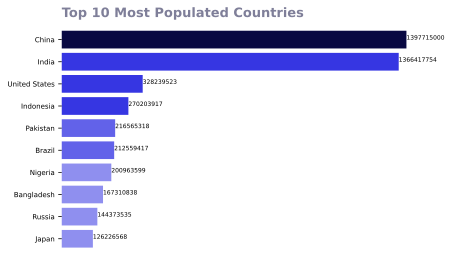

In [55]:
# Figure, axes
fig, ax = plt.subplots(figsize=(6.5 ,4))

# Barplot
ax = sns.barplot(x=x, y=y, orient="h", palette=bcolors)

# Labels
plt.ylabel("")
plt.yticks(size=7)
plt.xlabel("")
plt.xticks([])
3
# Title
fig.text(y=0.92,
         x=0.125,
         s="Top 10 Most Populated Countries",
         fontdict={"family": "bookman old style",
                   "weight": "bold",
                   "size": 13,
                   "color": "#000033"},
         alpha=0.5)

# Data Label
for key, value in enumerate(x):
    ax.text(value + 1, key, str(value), size=6)
    
# Removing the borders
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li>Besides belonging to the <b>Top 10 Biggest Land(Km2) Countries</b>, <i>China, India, USA, Bazil</i> and <i>Russia</i> are between the <b>Top 10 Most Populated Countries.</b>
</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              font-size: 17px;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li><b style = "color: red">Q5:</b> Considering all countries, how much percentage of the population live in <b>Urban Areas</b>?</li>
    </ul>
    <br>
</div>   

In [56]:
# Missing Values?
missing_values(df, "Urban_population")

Urban_population: 4 missing values.
Wich represents 0.02% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [57]:
# Mean and Median
mean_median(df, "Urban_population")

Urban_population mean  : 22304543.22
Urban_population median: 4678103.5


In [58]:
# Imputation with median
nan_index = df[df["Urban_population"].isna()].index

df["Urban_population"][nan_index] = df["Urban_population"].median()

<p>We have this information as a whole number, so in order to make it better to understand, we're going to create a new variable with the percentage representation.</p>

In [59]:
# Creating a new variable with the percentage of urban population
df["% Urban Population"] = round((df["Urban_population"] / df["Population"].astype("float64")) * 100, 2)

In [60]:
# Creating a new variable with the percentage of rural population
df["% Rural Population"] = (100 - df["% Urban Population"])

In [61]:
# Missing Values?
missing_values(df, "Urban_population")
missing_values(df, "Population")

0 missing values
0 missing values


In [62]:
mean_median(df, "Urban_population")

Urban_population mean  : 21941111.47
Urban_population median: 4678103.5


In [63]:
df["% Urban Population"]

0      25.75
1      61.23
2      73.19
3      87.98
4      66.18
       ...  
190    88.24
191    36.63
192    37.27
193    44.07
194    32.21
Name: % Urban Population, Length: 194, dtype: float64

In [64]:
urban_population = df[["Country",
                       "Land Area(Km2)",
                       "Population",
                       "Urban_population",
                       "% Urban Population",
                       "% Rural Population"]] \
                  .sort_values(by="% Urban Population",
                               ascending = False).head(10)

In [65]:
urban_population

,Country,Land Area(Km2),Population,Urban_population,% Urban Population,% Rural Population
73,Vatican City,0.0,836.0,4678103.5,559581.76,-559481.76
120,Nauru,21.0,10084.0,4678103.5,46391.35,-46291.35
56,Eswatini,17364.0,1093238.0,4678103.5,427.91,-327.91
128,North Macedonia,25713.0,1836713.0,4678103.5,254.70,-154.70
113,Monaco,2.0,38964.0,38964.0,100.00,0.00
156,Singapore,716.0,5703569.0,5703569.0,100.00,0.00
90,Kuwait,17818.0,4207083.0,4207083.0,100.00,0.00
141,Qatar,11586.0,2832067.0,2809071.0,99.19,0.81
16,Belgium,30528.0,11484055.0,11259082.0,98.04,1.96
12,Bahrain,765.0,1501635.0,1467109.0,97.70,2.30


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>It won't be able to make imputation with median or any other metric, because as we can see the first four registers, the percentage is wrong, because the number of population is lower than the % Urban population that we made the imputation before, so it'll gives us a wrong result, so let's drop this registers.</li>
    </ul>
    <br>
</div>   

In [66]:
# Coping the dataset
df_copy = df.copy()

# Filtering where the percentage is equals or lower than 100%
df_copy = df_copy[df_copy["% Urban Population"] <= 100]

urban_population = df_copy.sort_values(by="% Urban Population", ascending=False).head(10)

In [67]:
urban_population[["Country",
                  "Land Area(Km2)",
                  "Urban_population",
                  "% Urban Population",
                  "% Rural Population"]]

,Country,Land Area(Km2),Urban_population,% Urban Population,% Rural Population
113,Monaco,2.0,38964.0,100.00,0.00
156,Singapore,716.0,5703569.0,100.00,0.00
90,Kuwait,17818.0,4207083.0,100.00,0.00
141,Qatar,11586.0,2809071.0,99.19,0.81
16,Belgium,30528.0,11259082.0,98.04,1.96
12,Bahrain,765.0,1467109.0,97.70,2.30
149,San Marino,61.0,32969.0,97.37,2.63
187,Uruguay,176215.0,3303394.0,95.43,4.57
106,Malta,316.0,475902.0,94.68,5.32
76,Iceland,103000.0,339110.0,93.85,6.15


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li><i>Monaco, Singapore</i> and <i>Kuwait</i> doesn't have any of their population living in Rural Areas.</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              font-size: 17px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li><b style = "color: #cc0000;">Q6:</b> What is the top 10 countries with the highest population living in Rural Areas?</li>
    </ul>
    <br>
</div>   

In [68]:
rural_population = df_copy[["Country",
                            "Land Area(Km2)",
                            "Population",
                            "% Rural Population",
                            "% Urban Population"]] \
                   .sort_values(by="% Rural Population",
                                ascending=False).head(10)
rural_population

,Country,Land Area(Km2),Population,% Rural Population,% Urban Population
174,East Timor,14874.0,3500000.0,88.57,11.43
135,Papua New Guinea,462840.0,8776109.0,86.75,13.25
27,Burundi,27830.0,11530580.0,86.63,13.37
98,Liechtenstein,160.0,38019.0,85.63,14.37
125,Niger,1267000.0,23310715.0,83.48,16.52
102,Malawi,118484.0,18628747.0,82.83,17.17
144,Rwanda,26338.0,12626950.0,82.69,17.31
148,Samoa,2831.0,202506.0,82.43,17.57
54,Eritrea,117600.0,6333135.0,81.85,18.15
165,Sri Lanka,65610.0,21803000.0,81.41,18.59


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;
              font-size: 17px;">
    <ul>
        <li><b style = "color: #cc0000;">Q7:</b> Considering the <b>Top 10 Biggest Land Area(km2) Countries</b>, which of them have the highest percentage of population living in Rural Areas?</li>
    </ul>
    <br>
</div>   

In [69]:
top_10_rural_population = df_copy[["Country",
                                  "Land Area(Km2)",
                                  "Population",
                                  "% Rural Population",
                                  "% Urban Population"]] \
                          .sort_values(by="Land Area(Km2)",
                                       ascending=False).head(10)
top_10_rural_population

,Country,Land Area(Km2),Population,% Rural Population,% Urban Population
143,Russia,17098240.0,1.443735e+08,25.41,74.59
32,Canada,9984670.0,3.699198e+07,17.20,82.80
186,United States,9833517.0,3.282395e+08,17.54,82.46
36,China,9596960.0,1.397715e+09,39.69,60.31
23,Brazil,8515770.0,2.125594e+08,13.79,86.21
8,Australia,7741220.0,2.576660e+07,15.22,84.78
77,India,3287263.0,1.366418e+09,65.53,34.47
6,Argentina,2780400.0,4.493871e+07,8.01,91.99
87,Kazakhstan,2724900.0,1.851393e+07,42.46,57.54
2,Algeria,2381741.0,4.305305e+07,26.81,73.19


In [70]:
top_10_rural_population.drop(columns="Land Area(Km2)", inplace=True)

In [71]:
top_10_rural_population.sort_values(by="% Urban Population",
                                    ascending=True)

,Country,Population,% Rural Population,% Urban Population
77,India,1.366418e+09,65.53,34.47
87,Kazakhstan,1.851393e+07,42.46,57.54
36,China,1.397715e+09,39.69,60.31
2,Algeria,4.305305e+07,26.81,73.19
143,Russia,1.443735e+08,25.41,74.59
186,United States,3.282395e+08,17.54,82.46
32,Canada,3.699198e+07,17.20,82.80
8,Australia,2.576660e+07,15.22,84.78
23,Brazil,2.125594e+08,13.79,86.21
6,Argentina,4.493871e+07,8.01,91.99


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li>Besides India is one of the most populated country on top mundial, <b>more than 60%</b> of the population live in Rural Areas.</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;
              font-size: 17px;">
    <ul>
        <li><b style = "color: #cc0000;">Q8:</b> What are the Top 10 Countries with the highest gasoline price?</li>
    </ul>
    <br>
</div>   

In [72]:
# Missing Values?
missing_values(df, "Gasoline Price")

Gasoline Price: 19 missing values.
Wich represents 0.1% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [73]:
# mean vs median
mean_median(df, "Gasoline Price")

Gasoline Price mean  : 1.0
Gasoline Price median: 0.98


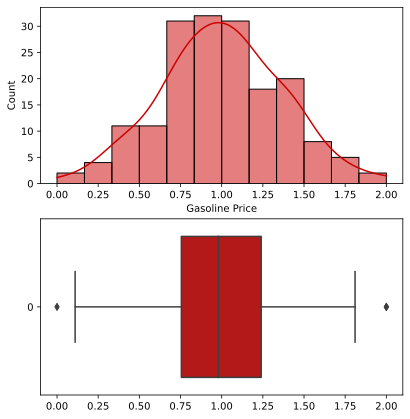

In [74]:
# Figure
plt.figure(figsize=(6.5, 7))

# Subplot 1 histogram
plt.subplot(211)
sns.histplot(data=df["Gasoline Price"], kde=True, color="#cc0000")

# Subplot 2 boxplot
plt.subplot(212)
sns.boxplot(data=df["Gasoline Price"], orient="h", color="#cc0000")

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>Eventhough we have Outlier values, the data follows a normal distribution, so to treat the NaN values, we're gonna use the mean.</li>
    </ul>
    <br>
</div>   

In [75]:
# Taking the index where the Gasoline Price is null
nan_index = df[df["Gasoline Price"].isna()].index

# Imputation with mean
df["Gasoline Price"][nan_index] = df["Gasoline Price"].mean()

In [76]:
highest_gasoline = df.groupby(["Country"])["Gasoline Price"] \
                              .agg(["sum"]).sort_values(by="sum",
                                                        ascending=False).head(10)

In [77]:
highest_gasoline

,sum
Country,
Eritrea,2.00
Monaco,2.00
Barbados,1.81
Norway,1.78
Liechtenstein,1.74
Iceland,1.69
Netherlands,1.68
Maldives,1.63
Italy,1.61


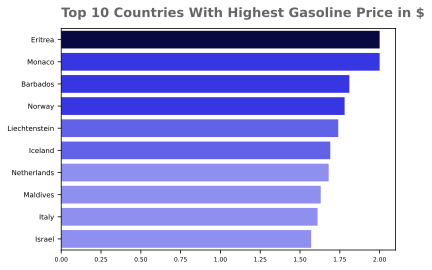

In [78]:
# Figure, axes
fig, ax = plt.subplots(figsize=(6, 4))

# Barplot
ax = sns.barplot(y=highest_gasoline.index,
                 x=highest_gasoline["sum"],
                 orient="h",
                 palette=bcolors)

# Labels
plt.ylabel("")
plt.yticks(size = 7)
plt.xlabel("")
plt.xticks(size = 6)

# Title
fig.text(y = 0.92,
         x = 0.125,
         s = "Top 10 Countries With Highest Gasoline Price in $",
         fontdict={"family": "bookman old style",
                   "size": 13,
                   "weight": "bold"},
         alpha = 0.6)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;
              font-size: 17px;">
    <ul>
        <li><b style = "color: #cc0000;">Q9:</b> What are the top 10 countries with the highest and lowest GDP?</li>
    </ul>
    <br>
</div>   

In [79]:
# Missing Values?
missing_values(df, "GDP")

GDP: 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [80]:
# mean vs median
mean_median(df, "GDP")

GDP mean  : 477295901399.54
GDP median: 34387229486.0


In [81]:
df["GDP"].describe()

count    1.930000e+02
mean     4.772959e+11
std      2.172173e+12
min      4.727146e+07
25%      8.454620e+09
50%      3.438723e+10
75%      2.340940e+11
max      2.142770e+13
Name: GDP, dtype: float64

In [82]:
df[df["GDP"].isna()]

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,% Urban Population,% Rural Population
73,Vatican City,2003.0,NaN,39.117553,0.0,NaN,NaN,379.0,Vatican City,NaN,NaN,NaN,EUR,NaN,32.015426,1.002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,NaN,NaN,836.0,NaN,NaN,NaN,NaN,4678103.5,41.902916,12.453389,559581.76,-559481.76


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>To anwers this question we won't be able to make an inputation, because every each country has it's own GDP, so as we don't have this information for the Vatican City we will remove it.</li>
    </ul>
    <br>
</div>   

In [83]:
# Taking the index
gdp = df_copy[df["GDP"].isna()].index

In [84]:
df_copy.drop(gdp, inplace=True)

In [85]:
mean_median(df_copy, "GDP")

GDP mean  : 484757704656.28
GDP median: 38359679044.5


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>There's a huge difference between the mean and the median too, it occurs because the countries has it's resources and the economy of each country is totally different.</li>
    </ul>
    <br>
</div>   

In [86]:
# Top 10 highest country GDP
highest = df_copy.groupby("Country")["GDP"].agg(["sum"]).sort_values(by="sum",
                                                                ascending = False).head(10)

In [87]:
# Top 10 lowest country GDP
lowest = df_copy.groupby("Country")["GDP"].agg(["sum"]).sort_values(by="sum",
                                                      ascending = True).head(10)

In [88]:
c1 = bcolors
c2 = bcolors.reverse()

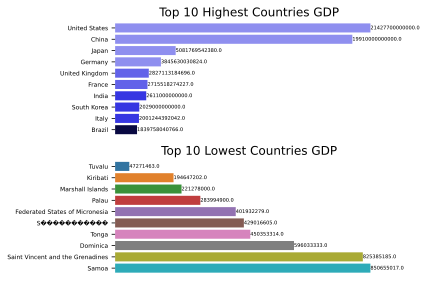

In [89]:
# Figure
plt.figure(figsize=(6, 4))

# Subplot 1 barplot
plt.subplot(211)
ax1 = sns.barplot(y=highest.index,
                  x=highest["sum"],
                  orient="h",
                  palette=c1)

# Title 1
plt.title("Top 10 Highest Countries GDP")
plt.yticks(size = 6)
plt.ylabel("")
plt.xlabel("")
plt.xticks([])

# Removing the borders
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

# Data label
for i, v in enumerate(highest['sum']):
    ax1.text(v + 10, i, str(v),
             color='black',
             ha='left',
             va='center',
             size= 5 )

# Subplot 2 barplot
plt.subplot(212)
ax2 = sns.barplot(y=lowest.index,
                  x=lowest["sum"],
                  orient="h",
                  palette=c2)

# Title 2
plt.title("Top 10 Lowest Countries GDP")
plt.yticks(size = 6)
plt.ylabel("")
plt.xlabel("")
plt.xticks([])

# Removing the borders
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# Data label
for i, v in enumerate(lowest['sum']):
    ax2.text(v + 10, i, str(v),
             color='black',
             ha='left',
             va='center',
             size= 5 )

# Tight layout
plt.tight_layout()

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;
              font-size: 17px;">
    <ul>
        <li><b style = "color: #cc0000;">Q10:</b> What is the most spoken language?</li>
    </ul>
    <br>
</div>   

In [90]:
# Counting the top 10 most spoken language
df["Official language"].value_counts().head(10)

English       31
French        25
Spanish       19
Arabic        17
Portuguese     7
None           4
German         4
Swahili        4
Russian        4
Italian        3
Name: Official language, dtype: int64

In [91]:
missing_values(df, "Official language")

Official language: 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [92]:
# Taking the index where Official language is null
nan_index = df_copy[df_copy["Official language"].isna()].index

In [93]:
# Dropping
df_copy.drop(nan_index, inplace=True)

In [94]:
# Which is this representation in percentage?
official_language = round((df_copy["Official language"].value_counts() / len(df_copy) * 100), 2)
official_language

English             15.34
French              13.23
Spanish             10.05
Arabic               8.99
Portuguese           3.70
                    ...  
Albanian             0.53
Jamaican English     0.53
Lao                  0.53
Latvian              0.53
Shona                0.53
Name: Official language, Length: 76, dtype: float64

In [95]:
# Setting up the axes
x = official_language.values[:10]
y = official_language.index[:10]

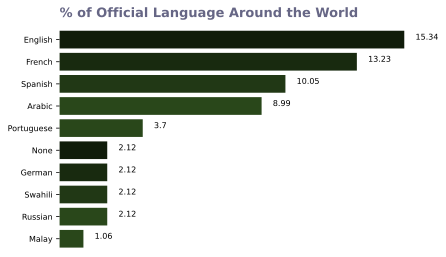

In [96]:
# Figure, axes
fig, ax = plt.subplots(figsize=(6.5, 4))

# Barplot
ax = sns.barplot(x=x, y=y, orient="h", palette=colors)

# Labels
plt.yticks(size=8)
plt.xticks([])

# Title
fig.text(y= 0.92,
         x= 0.125,
         s="% of Official Language Around the World",
         fontdict={"family": "bookman old style",
                   "size": 13,
                   "weight": "bold",
                   "color": "#000033"},
         alpha=0.6)

# Data label
for key, value in enumerate(x):
    ax.text(value + 0.5, key, str(value), size=8)

# Removing borders
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li><b>More than 15%</b> of the countries have <b>English</b> as it's official language.</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              font-size: 17px;
              padding-top: 20px">
    <ul>
        <li><b style = "color: red">Q11:</b> Which country has the <b>highest Unemployment Rate?</b></li>
    </ul>
    <br>
</div>

In [97]:
# Missing values?
missing_values(df, "Unemployment rate")

Unemployment rate: 18 missing values.
Wich represents 0.09% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [98]:
# mean vs median
mean_median(df, "Unemployment rate")

Unemployment rate mean  : 6.89
Unemployment rate median: 5.36


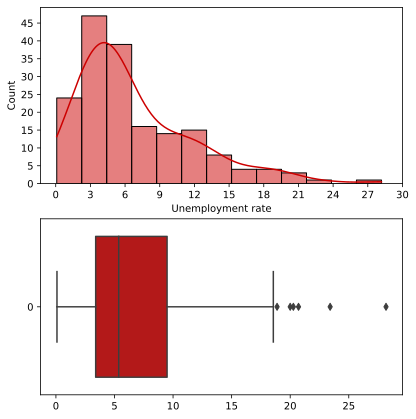

In [99]:
# Distribution of the data

# Figure
plt.figure(figsize=(6.5, 7))

# Subplot 1 histogram
plt.subplot(211)
sns.histplot(df["Unemployment rate"], kde=True, color="#cc0000")
plt.yticks(ticks=[x for x in range(0, 50, 5)])
plt.xticks(ticks=[x for x in range(0, 31, 3)])

# Subplot 2 boxplot
plt.subplot(212)
sns.boxplot(data=df["Unemployment rate"], orient="h", color="#cc0000")

plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>Eventhough the mean and median have a small difference, it's clear that the data doesn't follow a normal distribution, so to treat the NaN values, we're gonna input the median.</li>
    </ul>
    <br>
</div>   

In [100]:
# Taking the index
unemployment_index = df_copy[df_copy["Unemployment rate"].isna()].index

In [101]:
# imputation with median
df_copy["Unemployment rate"][unemployment_index] = df_copy["Unemployment rate"].median()

In [102]:
unemployment = df_copy[["Country",
                        "Population",
                        "% Urban Population", 
                        "% Rural Population",
                        "Unemployment rate"]] \
               .sort_values(by="Unemployment rate",
                            ascending=False).head(10)
unemployment

,Country,Population,% Urban Population,% Rural Population,Unemployment rate
161,South Africa,58558270.0,66.86,33.14,28.18
95,Lesotho,2125268.0,28.59,71.41,23.41
146,Saint Lucia,182790.0,18.75,81.25,20.71
119,Namibia,2494530.0,51.04,48.96,20.27
61,Gabon,2172579.0,89.74,10.26,20.00
147,Saint Vincent and the Grenadines,100455.0,57.92,42.08,18.88
97,Libya,6777452.0,80.39,19.61,18.56
21,Bosnia and Herzegovina,3301000.0,48.63,51.37,18.42
22,Botswana,2346179.0,68.90,31.10,18.19
66,Greece,10716322.0,79.39,20.61,17.24


In [103]:
lowest_unemployment = df_copy[["Country",
                        "Population",
                        "% Urban Population", 
                        "% Rural Population",
                        "Unemployment rate"]] \
               .sort_values(by="Unemployment rate",
                            ascending=True).head(10)
lowest_unemployment

,Country,Population,% Urban Population,% Rural Population,Unemployment rate
141,Qatar,2832067.0,99.19,0.81,0.09
125,Niger,23310715.0,16.52,83.48,0.47
159,Solomon Islands,669823.0,24.21,75.79,0.58
92,Laos,7169455.0,35.64,64.36,0.63
30,Cambodia,16486542.0,23.80,76.20,0.68
12,Bahrain,1501635.0,97.70,2.30,0.71
173,Thailand,69625582.0,50.69,49.31,0.75
144,Rwanda,12626950.0,17.31,82.69,1.03
176,Tonga,100209.0,24.09,75.91,1.12
121,Nepal,28608710.0,20.15,79.85,1.41


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li>The country with the highest Unemployment Rate is <b>South Africa</b> with <b>more than 28%</b>.</li>
        <br>
        <li>The country with the lowest Unemployment Rate is <b>Qatar</b> with <b>less than 1%</b>.</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              font-size: 17px;
              padding-top: 20px">
    <ul>
        <li><b style = "color: red">Q12:</b> Is there any correlation between <b>Unemplyoment Rate</b> and the <b>% of Population that lives in Rural Areas</b>?</li>
    </ul>
    <br>
</div>

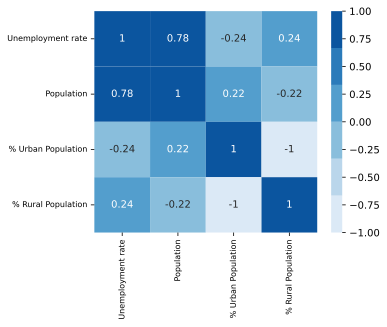

In [104]:
# sns.palplot(sns.color_palette("Blues",12))

# Defining the color palette
colormap = sns.color_palette("Blues")

# Creating the matriz for correlation
matriz_corr = unemployment[["Unemployment rate",
                            "Population",
                            "% Urban Population",
                            "% Rural Population"]].corr()

# Figure and axis
fig, ax = plt.subplots(figsize=(5,4))

# Heatmap graphic
sns.heatmap(data=matriz_corr, annot=True, cmap=colormap)

# Changing the label's size
plt.xticks(size=8)
plt.yticks(size=8)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li>There's a small correlation between <b>Unemplyoment Rate</b> with <b>% of Population that lives in Rural Areas</b>, which make us believe that the fact people live in rural areas <b>doesn't mean</b> they are unemployed, however there's a huge correlation between the <b>Population</b> with <b>Unemplyoment Rate</b>, which means that the higher are the Population the higher are the Unemplyoment Rate, which makes sense.</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              font-size: 17px;
              padding-top: 20px">
    <ul>
        <li><b style = "color: red">Q13:</b> Which are the countries with the highest avegare of life expectancy? </li>
    </ul>
    <br>
</div>

In [105]:
# Missing Values?
missing_values(df, "Life expectancy")

Life expectancy: 7 missing values.
Wich represents 0.04% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [106]:
df[df["Life expectancy"].isna()]

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,% Urban Population,% Rural Population
3,Andorra,164.0,AD,40.000000,468.0,NaN,7.2,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.000000,1.510000,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,87.98,12.02
56,Eswatini,67.0,NaN,39.117553,17364.0,NaN,NaN,268.0,Mbabane,NaN,NaN,NaN,NaN,NaN,32.015426,1.002457,3.791304e+09,NaN,NaN,NaN,Mbabane,NaN,NaN,NaN,English,11.3,NaN,1093238.0,NaN,28.6,NaN,NaN,4678103.5,-26.522503,31.465866,427.91,-327.91
73,Vatican City,2003.0,NaN,39.117553,0.0,NaN,NaN,379.0,Vatican City,NaN,NaN,NaN,EUR,NaN,32.015426,1.002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,NaN,NaN,836.0,NaN,NaN,NaN,NaN,4678103.5,41.902916,12.453389,559581.76,-559481.76
113,Monaco,26337.0,MC,39.117553,2.0,NaN,5.9,377.0,Monaco City,NaN,NaN,NaN,EUR,NaN,32.015426,2.000000,7.184844e+09,NaN,NaN,2.6,Monaco City,NaN,NaN,11.72,French,6.1,6.56,38964.0,NaN,NaN,NaN,NaN,38964.0,43.738418,7.424616,100.00,0.00
120,Nauru,541.0,NR,39.117553,21.0,NaN,NaN,674.0,Yaren District,NaN,NaN,NaN,AUD,NaN,32.015426,1.002457,1.330000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,10084.0,NaN,NaN,NaN,NaN,4678103.5,-0.522778,166.931503,46391.35,-46291.35
128,North Macedonia,83.0,NaN,39.117553,25713.0,NaN,NaN,389.0,Skopje,NaN,NaN,NaN,MKD,NaN,32.015426,1.002457,1.022078e+10,NaN,NaN,NaN,Skopje,NaN,NaN,NaN,Macedonian,35.6,NaN,1836713.0,NaN,NaN,NaN,NaN,4678103.5,41.608635,21.745275,254.70,-154.70
181,Tuvalu,393.0,TV,60.000000,26.0,NaN,NaN,688.0,Funafuti,11.0,NaN,NaN,AUD,NaN,33.300000,1.002457,4.727146e+07,86.0,NaN,20.6,Singapore,NaN,NaN,NaN,Tuvaluan Language,0.7,0.92,11646.0,NaN,NaN,NaN,NaN,7362.0,-7.109535,177.649330,63.21,36.79


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>To calculate the life expactancy of a country we depend on a lot of factors such as:
            <ul>
                <li> Genetic</li>
                <li> Conditions</li>
                <li> Life Style</li>
                <li> Acess to health resources</li>
                <li> Nutrition</li>
            </ul>
        </li>
        <br>
        <li>For this reason we won't be able to just make an imputation on the NaN values, instead of this we're going to drop it.</li>
    </ul>
    <br>
</div>   

In [107]:
# Taking the index where Life expectancy is null
nan_index = df_copy[df_copy["Life expectancy"].isna()].index

df_copy.drop(nan_index, inplace=True)

In [108]:
mean_median(df, "Life expectancy")

Life expectancy mean  : 72.28
Life expectancy median: 73.2


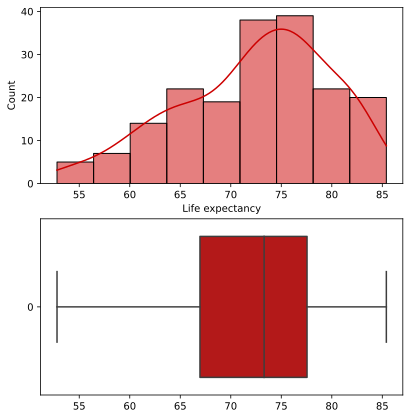

In [109]:
# Figure
plt.figure(figsize=(6.5, 7))

# Subplot 1 histogram
plt.subplot(211)
sns.histplot(data=df_copy["Life expectancy"], kde=True, color="#cc0000")

# Subplot 2 boxplot
plt.subplot(212)
sns.boxplot(data=df_copy["Life expectancy"], orient="h", color="#cc0000")

# Show
plt.show()

In [110]:
highest_life = df_copy[["Country",
                        "Life expectancy"]].sort_values(by="Life expectancy",
                                                       ascending=False).head(10)

In [111]:
lowest_life = df_copy[["Country",
                       "Life expectancy"]].sort_values(by="Life expectancy",
                                                       ascending=True).head(10)

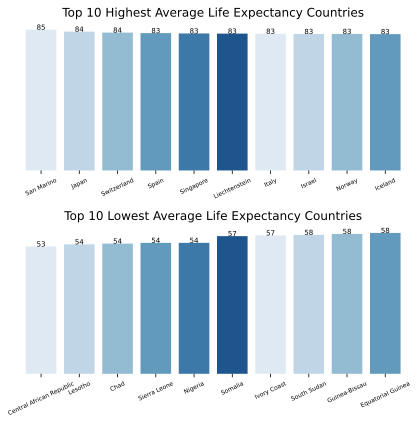

In [112]:
# Figure
plt.figure(figsize=(6, 6))

# Subplot 1
plt.subplot(211)
ax1 = sns.barplot(x=highest_life["Country"],
                  y=highest_life["Life expectancy"],
                  palette=colormap)

# Title
plt.title("Top 10 Highest Average Life Expectancy Countries")

# Labels
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.xticks(size=6, rotation=25)

# Removing borders
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

# Datta label
for i in ax1.patches:
    ax1.annotate(format(i.get_height(),'.0f'), (i.get_x() + 0.4, i.get_height()),
                 ha="center", color="black", size=7)

# Subplot 2
plt.subplot(212)
ax2 = sns.barplot(x=lowest_life["Country"],
                  y=lowest_life["Life expectancy"],
                  palette=colormap)

# Title
plt.title("Top 10 Lowest Average Life Expectancy Countries")

# Labels
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.xticks(size=6, rotation=25)

# Removing borders
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# Data label
for i in ax2.patches:
    ax2.annotate(format(i.get_height(), ".0f"), (i.get_x() + 0.4, i.get_height()),
                 ha="center", color="black", size=7)

# Tight layout
plt.tight_layout()

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>The average life expectancy difference between <b>First World Countries</b> like <i>San Marino, Japan, Switzerland</i> compared to <b>Third World Countries</b> like <i>Central African Republic, Lesotho</i> and others is <b>more than 30 years</b>.</li>
    </ul>
    <br>
</div>   

In [113]:
# Missing Values?
missing_values(df_copy, 'Life expectancy')
missing_values(df_copy, 'Birth Rate')
missing_values(df_copy, 'Population')

0 missing values
0 missing values
0 missing values


In [114]:
df_copy["Birth Rate"].describe()

count    186.000000
mean      20.301022
std        9.889312
min        6.400000
25%       11.425000
50%       18.010000
75%       28.722500
max       46.080000
Name: Birth Rate, dtype: float64

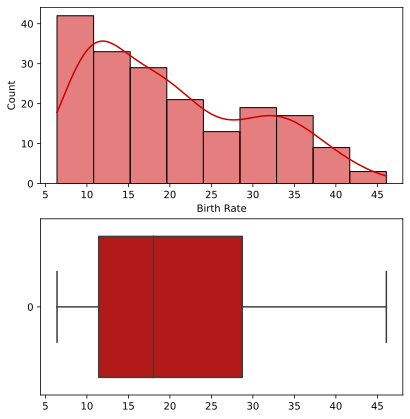

In [115]:
# Figure
plt.figure(figsize=(6.5, 7))

# Subplot 1 histogram
plt.subplot(211)
sns.histplot(data=df_copy["Birth Rate"], kde=True, color="#cc0000")

# Subplot 2 boxplot
plt.subplot(212)
sns.boxplot(data=df_copy["Birth Rate"], orient="h", color="#cc0000")

# Show
plt.show()

In [116]:
# Aggregating for life expectancy to get the top 10 highest AVG
df_copy[["Country",
         "Population",
         "Life expectancy",
         "Birth Rate"]].sort_values(by="Life expectancy",
                                    ascending=False).head(10)

,Country,Population,Life expectancy,Birth Rate
149,San Marino,33860.0,85.4,6.8
85,Japan,126226568.0,84.2,7.4
169,Switzerland,8574832.0,83.6,10.0
164,Spain,47076781.0,83.3,7.9
156,Singapore,5703569.0,83.1,8.8
98,Liechtenstein,38019.0,83.0,9.9
83,Italy,60297396.0,82.9,7.3
82,Israel,9053300.0,82.8,20.8
129,Norway,5347896.0,82.8,10.4
76,Iceland,361313.0,82.7,12.0


In [117]:
# Aggregating for birth rate
df_copy[["Country",
         "Population",
         "Life expectancy",
         "Birth Rate"]].sort_values(by="Birth Rate",
                                    ascending=False).head(10)

,Country,Population,Life expectancy,Birth Rate
125,Niger,23310715.0,62.0,46.08
34,Chad,15946876.0,54.0,42.17
160,Somalia,15442905.0,57.1,41.75
105,Mali,19658031.0,58.9,41.54
45,Democratic Republic of the Congo,86790567.0,60.4,41.18
4,Angola,31825295.0,60.8,40.73
27,Burundi,11530580.0,61.2,39.01
62,The Gambia,2347706.0,61.7,38.54
182,Uganda,44269594.0,63.0,38.14
26,Burkina Faso,20321378.0,61.2,37.93


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>It was observed that countries with lower average of life expectancy has a higher birth rate, which means that probably because of their conditions it can be difficult to take care of all the childrem.</li>
        <br>
        <li>To analyze it in more details let's check it out about correlations between all these factors.</li>
    </ul>
    <br>
</div>   

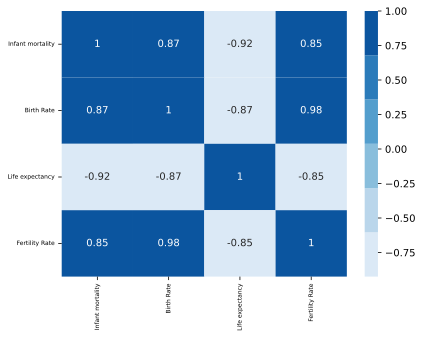

In [118]:
# Creating a correlation
matriz_corr = df[["Infant mortality",
                  "Birth Rate",
                  "Life expectancy",
                  "Fertility Rate"]].corr()

# Heatmap
sns.heatmap(data=matriz_corr, annot=True, cmap=colormap)

# Labels
plt.yticks(size=6)
plt.xticks(size=6)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
<ul>
    <li style = "font-size: 16px;
                 font-weight: bold;">Fertility Rate vs. Infant Mortality Rate:</li>
    <ul>
        <li>There is a strong positive correlation (0.85) between the fertility rate (average number of children per woman) and the infant mortality rate (number of deaths of children under 1 year per 1,000 births). This may indicate that in countries with a higher fertility rate, there could be greater pressure on healthcare resources and care to ensure the survival of children.</li>
        <br>
    </ul>
    <li style = "font-size: 16px;
                 font-weight: bold;">Fertility Rate vs. Life Expectancy:</li>
    <ul>
        <li>There is a strong negative correlation (-0.85) between the fertility rate and life expectancy. This suggests that in countries with a high fertility rate, life expectancy tends to be lower. This could be related to the fact that in countries with high fertility rates, there may be challenges in providing basic healthcare and education resources to the population.</li>
        <br>
    </ul>
    <li style = "font-size: 16px;
                 font-weight: bold;">Fertility Rate vs. Birth Rate:</li>
    <ul>
        <li>There is a very strong positive correlation (0.98) between the fertility rate and the birth rate (number of births per 1,000 people). This suggests that the two are highly related, and in countries with a higher fertility rate, it is also more likely to have a high birth rate.</li>
        <br>
    </ul>
    <li style = "font-size: 16px;
                 font-weight: bold;">Birth Rate vs. Life Expectancy:</li>
    <ul>
        <li>There is a very strong negative correlation (-0.92) between the birth rate and life expectancy. This may indicate that in countries with a high birth rate, limited resources may be stretched to meet the population's needs, affecting life expectancy.</li>
        <br>
    </ul>
    <li style = "font-size: 16px;
                 font-weight: bold;">Birth Rate vs. Infant Mortality Rate:</li>
    <ul>
        <li>There is a significant positive correlation (0.87) between the birth rate and the infant mortality rate. This can be explained by the fact that in countries with a high birth rate, the healthcare system may face challenges in providing adequate care for mothers and newborns, leading to a higher infant mortality rate.</li>
    </ul>
</ul>
    <br>
</div>

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              font-size: 17px;
              padding-top: 20px">
    <ul>
        <li><b style = "color: red">Q14:</b> What is the country with the biggest Armed Forces size?</li>
    </ul>
    <br>
</div>

In [119]:
# Missing values?
missing_values(df, "Armed Forces size")

Armed Forces size: 23 missing values.
Wich represents 0.12% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>There's some missing values which probably represents that some countries don't have any armed force</li>
    </ul>
    <br>
</div>   

In [120]:
mean_median(df, "Armed Forces size")

Armed Forces size mean  : 159274.85
Armed Forces size median: 31000.0


In [121]:
df["Armed Forces size"].max()

3031000.0

In [122]:
scale = [x for x in range(0, 3031000, 300000)]

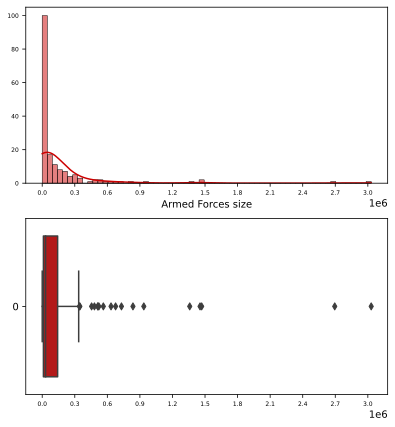

In [123]:
# Figure
plt.figure(figsize=(6.5, 7))

# Subplot 1 histogram
plt.subplot(211)
sns.histplot(data=df["Armed Forces size"], kde=True, color="#cc0000")

# Labels
plt.xticks(ticks=scale, size=6)
plt.ylabel("")
plt.yticks(size=6)

# Subplot 2 boxplot
plt.subplot(212)
sns.boxplot(data=df["Armed Forces size"], orient="h", color="#cc0000")

# Labels
plt.xticks(ticks=scale, size=6)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>The most of the countries armed size are <b>too low</b> of the first scale of 100K, their median is <b>31K</b>, however there are countries that their armed size can reach <b>3M.</b></li>
        <br>
        <li>Which are these countries?</li>
    </ul>
    <br>
</div>   

In [124]:
# Countries which their armed forces size is higher than 1M
df.loc[df["Armed Forces size"] >= 1000000, ["Country", "Armed Forces size"]] \
       .sort_values(by="Armed Forces size",
                    ascending=False)

,Country,Armed Forces size
77,India,3031000.0
36,China,2695000.0
127,North Korea,1469000.0
143,Russia,1454000.0
186,United States,1359000.0


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h2 style = "padding-left: 15px;
                 color: #cc0000">Conclusion:</h2>
    <ul>
        <li>The 2 most populated countries (<i>China</i> and <i>India</i>) are the countries with the biggest Armed Forces Size too.</li>
    <br>
        <li>India is the country with the biggest Armed Forces Size in the world, with an army size of <b>more than 3M.</b></li>
    <br>
    </ul>
</div>   

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              font-size: 17px;
              padding-top: 20px">
    <ul>
        <li><b style = "color: red">Q15:</b> What are the countries with the highest Co2 Emissions?</li>
    </ul>
    <br>
</div>

In [125]:
df[["Country", "Co2-Emissions"]].sort_values(by="Co2-Emissions",
                                             ascending=False).head(10)

,Country,Co2-Emissions
36,China,9893038.0
186,United States,5006302.0
77,India,2407672.0
143,Russia,1732027.0
85,Japan,1135886.0
64,Germany,727973.0
79,Iran,661710.0
162,South Korea,620302.0
151,Saudi Arabia,563449.0
78,Indonesia,563325.0


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>Four of the five countries with the largest army are also the ones that emit the most Co2</li>
    </ul>
    <br>
</div>   

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <ul>
        <li>Is there any correlation between the Army Size and the Co2 Emission?</li>
    </ul>
    <br>
</div>   

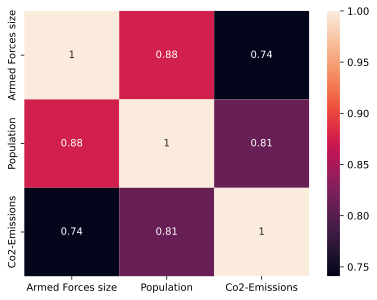

In [126]:
# Matriz of correlation
armed_corr = df[["Armed Forces size",
                 "Population",
                 "Co2-Emissions"]].corr()

# Heatmap
sns.heatmap(armed_corr, annot=True)

# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 20px;">
    <h1 style = "padding-left: 20px;">End. 🌎</h1>
    <br>
</div>   